In [20]:
import pickle
import pandas as pd
import numpy as np

import sys
sys.path.append("C:/Users/blaze/Desktop/opsi_eeg_denoising/eeg-denoising/src")  # Adjust this path as needed
from metrics import rmse_value, pearson_correlation, snr
from vis import plot_eeg

In [21]:
data_path = "C:/Users/blaze/Desktop/opsi_eeg_denoising/eeg-denoising/data/eeg_dataset.pkl"
with open(data_path, "rb") as f:
    eeg_datasets_dict = pickle.load(f)
#eeg_datasets_dict
results_emd_dataset = eeg_datasets_dict["results_emd_denoising"]
results_eemd_dataset = eeg_datasets_dict["results_eemd_denoising"]
original_eeg_dataset = eeg_datasets_dict["original_eeg"]

In [22]:
original_eeg = original_eeg_dataset["dataset_original"]["original_scaled_eeg"]
channel_names = original_eeg_dataset["dataset_original"]["channel_names"]
noisy_eeg = original_eeg_dataset["dataset_noisy"]["noisy_scaled_eeg"]

In [23]:
#Calculating Metrics for EMD

metrics_results = pd.DataFrame(columns=["IMFs removed", 'rmse', 'pearson_correlation', 'snr'])

for i, dataset_results in enumerate(results_emd_dataset):
    parameter_sets = dataset_results['parameter_sets']
    denoised_signals = dataset_results['denoised_signals']
    print(f"Original signal shape: {len(parameter_sets)}")
    print(f"Parameter sets shape: {len(denoised_signals)}")

    rmse_ = np.mean([rmse_value(original, denoised) for original, denoised in zip(original_eeg, denoised_signals)])
    pearson = np.mean([pearson_correlation(original, denoised) for original, denoised in zip(original_eeg, denoised_signals)])
    snr_ = np.mean([snr(original, denoised) for original, denoised in zip(original_eeg, denoised_signals)])
    print(f"Parameters: {parameter_sets[0]}, RMSE: {rmse_}, Pearson: {pearson}")

    metrics_results.loc[len(metrics_results)] = [parameter_sets[0], rmse_, pearson, snr_]
    print(f"Metrics results shape: {len(metrics_results)}")

Original signal shape: 64
Parameter sets shape: 64
Parameters: 1, RMSE: 0.3696809882696814, Pearson: 0.9324191148582766
Metrics results shape: 1
Original signal shape: 64
Parameter sets shape: 64
Parameters: 2, RMSE: 0.4187884193286232, Pearson: 0.9066790248080823
Metrics results shape: 2


In [24]:
# Results of EMD denoising
metrics_results

,IMFs removed,rmse,pearson_correlation,snr
0,1.0,0.369681,0.932419,7.796469
1,2.0,0.418788,0.906679,5.530324


In [25]:
#Calculating Metrics for EEMD
results_eemd = results_eemd_dataset[0]
num_signals = len(results_eemd)
num_params = len(results_eemd[0]['parameter_sets'])
print(num_signals, num_params)

metrics_results_eemd = pd.DataFrame(columns=["Ensembles", 'rmse', 'pearson_correlation', 'snr'])

for param_idx in range(num_params):
    param = results_eemd[0]['parameter_sets'][param_idx]  # Assume all signals have the same param order

    rmse_list = []
    pearson_list = []
    snr_list = []

    for sig_idx in range(num_signals):
        original = original_eeg[sig_idx]
        denoised = results_eemd[sig_idx]['denoised_signals'][param_idx]

        rmse_list.append(rmse_value(original, denoised))
        pearson_list.append(pearson_correlation(original, denoised))
        snr_list.append(snr(original, denoised))

    rmse_mean = np.mean(rmse_list)
    pearson_mean = np.mean(pearson_list)
    snr_mean = np.mean(snr_list)

    metrics_results_eemd.loc[len(metrics_results_eemd)] = [param, rmse_mean, pearson_mean, snr_mean]


64 3


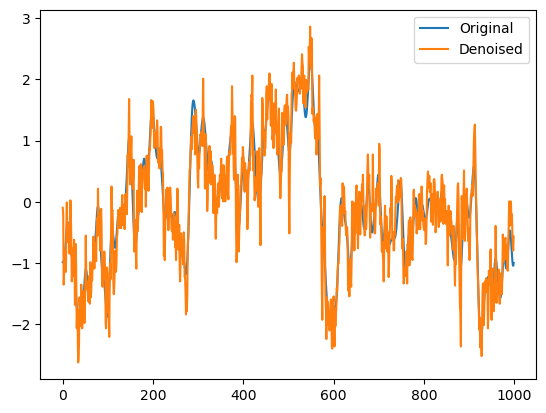

In [26]:
import matplotlib.pyplot as plt
denoised_plotted = results_eemd[0]['denoised_signals'][0]

plt.plot(denoised_plotted[:1000])
plt.plot(original_eeg[0][:1000])
plt.legend(['Original', 'Denoised'])
plt.show()


In [27]:
metrics_results_eemd.head()

,Ensembles,rmse,pearson_correlation,snr
0,25.0,0.385737,0.920461,6.400265
1,50.0,0.384297,0.921021,6.447871
2,100.0,0.383555,0.921327,6.470309
